In [22]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [23]:
data=pd.read_csv("/Users/md.redyanahmed/Downloads/exoplanet-test.csv")

In [24]:
data.head()

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,153,BD+45 564 b,BD+45 564,1,1,1,Radial Velocity,2021,Haute-Provence Observatory,Published Confirmed,...,-0.03,7.557,0.024,-0.024,9.41266,0.000255,-0.000255,5/28/21,2021-05,5/28/21
1,157,BD+55 362 b,BD+55 362,1,1,1,Radial Velocity,2021,Haute-Provence Observatory,Published Confirmed,...,-0.03,7.331,0.021,-0.021,9.15305,0.000163,-0.000163,5/28/21,2021-05,5/28/21
2,158,BD+63 1405 b,BD+63 1405,1,1,1,Radial Velocity,2021,Haute-Provence Observatory,Published Confirmed,...,-0.03,6.780,0.017,-0.017,8.70500,0.000257,-0.000257,5/28/21,2021-05,5/28/21
3,159,BD-00 4475 b,BD-00 4475,1,1,1,Radial Velocity,2021,Haute-Provence Observatory,Published Confirmed,...,-0.03,6.996,0.026,-0.026,8.78101,0.000253,-0.000253,5/28/21,2021-05,5/28/21
4,177,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,1,Imaging,2021,Hubble Space Telescope,Published Confirmed,...,NaN,14.593,0.098,-0.098,NaN,NaN,NaN,5/17/21,2020-12,5/17/21


In [40]:
data.tail()

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
177,28835,TOI-674 b,TOI-674,1,1,1,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,...,-0.041,9.469,0.019,-0.019,13.09140,0.000426,-0.000426,7/12/21,2021-06,7/12/21
178,28836,TOI-674 b,TOI-674,0,1,1,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),TESS Project Candidate,...,-0.041,9.469,0.019,-0.019,13.09140,0.000426,-0.000426,5/21/21,2017-07,5/21/21
179,28894,TYC 0434-04538-1 b,TYC 0434-04538-1,1,1,1,Radial Velocity,2021,Multiple Observatories,Published Confirmed,...,-0.014,7.413,0.027,-0.027,9.92369,0.000348,-0.000348,2/5/21,2021-01,2/11/21
180,29029,WASP-110 b,WASP-110,1,1,1,Transit,2021,Paranal Observatory,Published Confirmed,...,-0.092,10.871,0.023,-0.023,12.55170,0.000155,-0.000155,6/11/21,2021-05,6/11/21
181,29636,YSES 2 b,YSES 2,1,1,1,Imaging,2021,Paranal Observatory,Published Confirmed,...,-0.011,8.358,0.029,-0.029,10.53520,0.002319,-0.002319,5/28/21,2021-04,5/28/21


In [25]:
data.describe()

,loc_rowid,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,182.000000,182.000000,182.000000,182.000000,182.0,182.0,1.720000e+02,1.660000e+02,1.660000e+02,173.0,...,181.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,174.000000,174.000000,174.000000
mean,13791.269231,0.642857,1.087912,1.857143,2021.0,0.0,4.770041e+04,3.592362e+03,-3.112181e+03,0.0,...,-82.927600,11.114619,0.053898,-0.053898,8.685074,0.139914,-0.139914,10.751006,0.000482,-0.000482
std,13177.685581,0.480479,0.283948,1.309307,0.0,0.0,6.129882e+05,3.677764e+04,3.650125e+04,0.0,...,407.199548,2.632504,0.048441,0.048441,2.360157,1.063094,1.063094,2.512120,0.000797,0.000797
min,153.000000,0.000000,1.000000,1.000000,2021.0,0.0,4.702540e-01,5.000000e-07,-4.700000e+05,0.0,...,-2360.000000,4.415400,0.002000,-0.214100,2.989000,0.012000,-9.995000,4.279650,0.000148,-0.008487
25%,1502.250000,0.000000,1.000000,1.000000,2021.0,0.0,4.012186e+00,2.000000e-05,-1.125000e-02,0.0,...,-2.794000,8.855000,0.030000,-0.076000,6.955000,0.020000,-0.026000,8.719780,0.000261,-0.000448
50%,4526.500000,1.000000,1.000000,1.000000,2021.0,0.0,1.035496e+01,4.476000e-04,-4.476000e-04,0.0,...,-0.242300,10.936000,0.030000,-0.030000,8.600000,0.022000,-0.022000,10.641700,0.000321,-0.000321
75%,28749.750000,1.000000,1.000000,2.000000,2021.0,0.0,3.587270e+01,1.110750e-02,-1.925000e-05,0.0,...,-0.097100,13.440000,0.076000,-0.030000,10.270000,0.026000,-0.020000,12.754300,0.000448,-0.000261
max,29636.000000,1.000000,2.000000,6.000000,2021.0,0.0,8.040000e+06,4.700000e+05,-5.000000e-07,0.0,...,-0.002485,20.154400,0.214100,-0.002000,14.593000,9.995000,-0.012000,19.879000,0.008487,-0.000148


In [26]:
print(data.shape)

(182, 93)


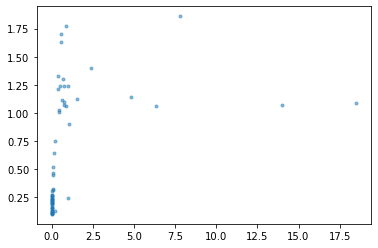

In [27]:
# Make a quick mass-radius diagram!

# Plot the data with mass (in units of Jupiter masses) on the x-axis and radius 
# (in units of Jupiter radii) on the y-axis.

# '.'   --> use small unconnected dots to plot the data points
# alpha --> governs the transparency of each datapoint: 0 = completely transparent, 1 = completely opaque.
# (alpha = 0.3 will let us see the density of the data points more easily)
plt.plot(data['pl_bmassj'], data['pl_radj'], '.', alpha=0.5)

# At the end, show the plot
plt.show()

let's replot things with log axes. Let's also add axis labels so we actually know what is being plotted. As a bonus, we'll add some text to the plot to show how many exoplanets are being included.

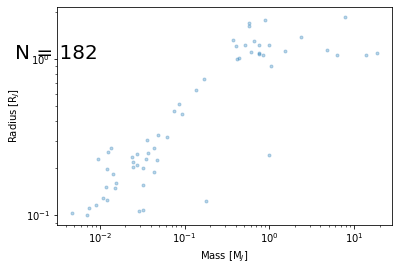

In [28]:
# Plot the data with mass (in units of Jupiter masses) on the x-axis
plt.plot(data['pl_bmassj'], data['pl_radj'], '.', alpha=0.3)

# Label your axes with units!
plt.xlabel('Mass [M$_J$]', fontsize=10)   # You can use LaTex formatting to make your plots look more professional...
plt.ylabel('Radius [R$_J$]', fontsize=10) # more on LaTex later in the summer! $_J$ creates a subscript J for Jupiter

# Add some text to the plot so we know how many data points there are
n_planets = len(data) # Number of planets being plotted

# plt.text(x-coordinate, y-coordinate, text string, **kwargs) # x and y coordinates are in data units
plt.text(1e-3, 1, f'N = {n_planets}', fontsize=20)

# Set the x and y-axis scales to be log so we can see structure more easily
plt.xscale('log')
plt.yscale('log')

# At the end, show the plot
plt.show()

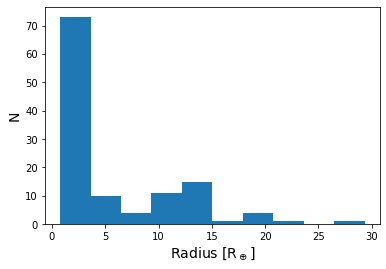

In [29]:
# Make a histogram of planet's in units of Earth radius
plt.hist(data['pl_rade']) # Plot the histogram

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14)
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

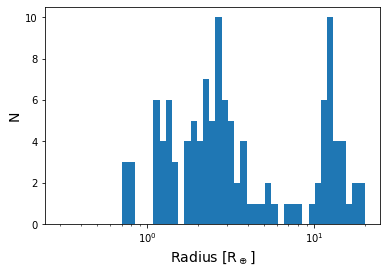

In [30]:
# Create bins that are uniformly-sized in log space
log_bins = np.logspace(np.log10(0.3), np.log10(20), 50)
plt.hist(data['pl_rade'], bins = log_bins)

# Log scale on the x-axis
plt.xscale('log')

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14) # More LaTex. \oplus gives us the symbol for Earth
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

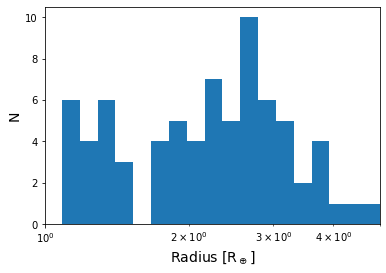

In [31]:
plt.hist(data['pl_rade'], bins = log_bins) # Using the same bins as above

# Let's zoom in on the distribution of planet radii in this region
plt.xlim([1., 5]) # Units of Earth radius

# Same plot housekeeping as above
# -------------------------------
# Log scale on the x-axis
plt.xscale('log')

# Label the axes
plt.xlabel('Radius [R$_\oplus$]', fontsize=14) # More LaTex. \oplus gives us the symbol for Earth
plt.ylabel('N', fontsize=14)

# Show the plot
plt.show()

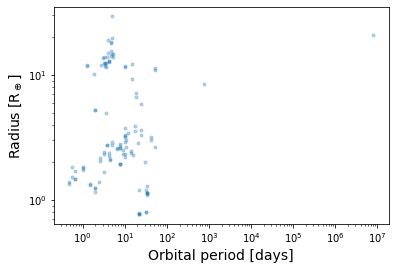

In [32]:
# Plot orbital period vs planet radius
plt.plot(data['pl_orbper'], data['pl_rade'], '.', alpha=0.3)

# Plot housekeeping
plt.xlabel('Orbital period [days]', fontsize=14)
plt.ylabel('Radius [R$_\oplus$]', fontsize=14)

# Log scale so we can see structure
plt.xscale('log')
plt.yscale('log')

plt.show()

<Figure size 1440x2016 with 0 Axes>

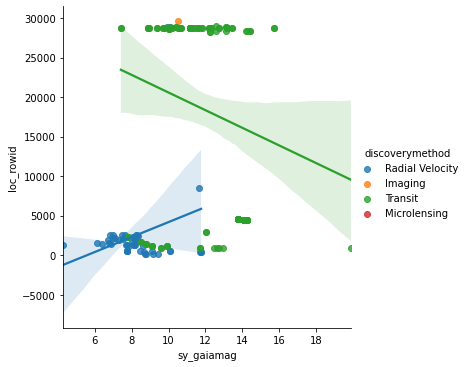

<Figure size 1440x2016 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='sy_gaiamag',y='loc_rowid', hue='discoverymethod', data= data)
plt.figure(figsize=(20,28))

<Figure size 1440x2016 with 0 Axes>

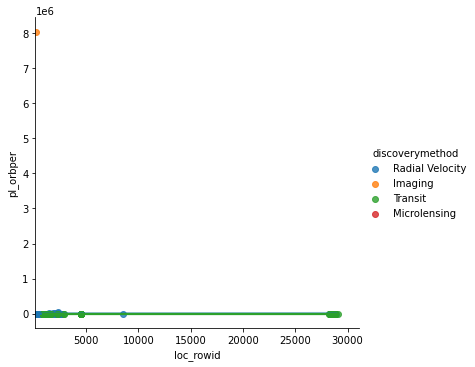

<Figure size 1440x2016 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(y='pl_orbper',x='loc_rowid', hue='discoverymethod', data= data)
plt.figure(figsize=(20,28))

/Users/md.redyanahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1440x2016 with 0 Axes>

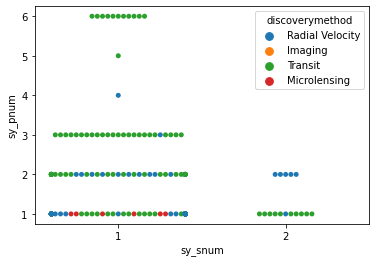

<Figure size 1440x2016 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.swarmplot(y='sy_pnum',x='sy_snum', hue='discoverymethod', data= data)
plt.figure(figsize=(20,28))

<Figure size 1440x2016 with 0 Axes>

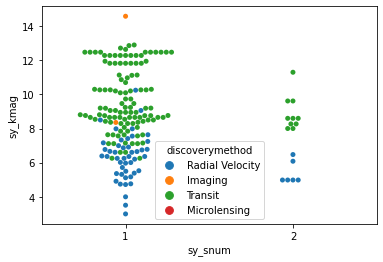

<Figure size 1440x2016 with 0 Axes>

In [61]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.swarmplot(y='sy_kmag',x='sy_snum', hue='discoverymethod', data= data)
plt.figure(figsize=(20,28))

<Figure size 1440x2016 with 0 Axes>

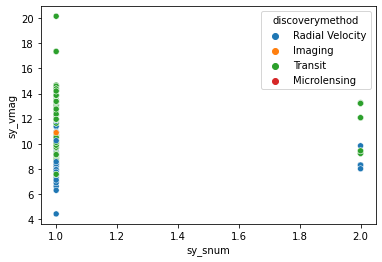

<Figure size 1440x2016 with 0 Axes>

In [62]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(y='sy_vmag',x='sy_snum', hue='discoverymethod', data= data)
plt.figure(figsize=(20,28))

Text(0.5, 1.0, 'Brightness of the lens star, in V-band')

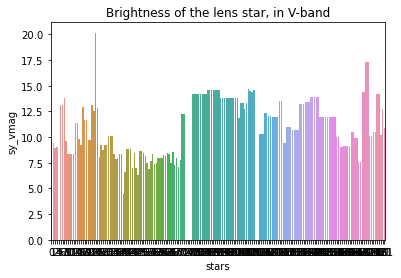

In [57]:
sns.barplot(x=data.index, y=data['sy_vmag'])
plt.xlabel('stars')
plt.title("Brightness of the lens star, in V-band")